In [5]:
import pandas as pd
from sdv.single_table import TVAESynthesizer
from sdv.metadata import Metadata
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import evaluate_quality
import os

In [6]:
# Load the real data
real_data = pd.read_csv('../datasets/ben10_master.csv')

In [7]:
# Load or create metadata
metadata_path = 'metadata.json'

if os.path.exists(metadata_path):
    metadata = Metadata.load_from_json(metadata_path)
    print("Loaded metadata from metadata.json")
else:
    metadata = Metadata()
    metadata.detect_table_from_dataframe(
        table_name='ben10_table',
        data=real_data
    )
    metadata.save_to_json(metadata_path)
    print("Created and saved new metadata to metadata.json")

Loaded metadata from metadata.json


In [8]:
# Initialize and fit the TVAE Synthesizer
synthesizer = TVAESynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=2000,
    verbose=True,
    cuda=True,
)
synthesizer.fit(real_data)

Loss: 9.876: 100%|██████████| 2000/2000 [00:28<00:00, 70.74it/s] 


In [9]:
# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=10000)

In [10]:
# Save the synthetic data to a CSV file
synthetic_data.to_csv('../datasets/ben10_TVAE_synthetic.csv', index=False)
print("Synthetic dataset saved to ../datasets/ben10_TVAE_synthetic.csv")

Synthetic dataset saved to ../datasets/ben10_TVAE_synthetic.csv


In [11]:
# Evaluate the quality of the synthetic data
quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)
print("Column Shapes Details:", quality_report.get_details(property_name='Column Shapes'))
print("Column Pair Trends Details:", quality_report.get_details(property_name='Column Pair Trends'))

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 619.05it/s]|
Column Shapes Score: 71.95%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 216.67it/s]|
Column Pair Trends Score: 46.56%

Overall Score (Average): 59.25%

Column Shapes Details:                    Column        Metric     Score
0              alien_name  TVComplement  0.418633
1              enemy_name  TVComplement  0.460367
2          alien1_species  TVComplement  0.448267
3      alien1_home_planet  TVComplement  0.753433
4   alien1_strength_level  TVComplement  0.948933
5      alien1_speed_level  TVComplement  0.967767
6     alien1_intelligence  TVComplement  0.974933
7          alien2_species  TVComplement  0.455467
8      alien2_home_planet  TVComplement  0.525667
9   alien2_strength_level  TVComplement  0.971300
10     alien2_speed_level  TVComplement  0.936533
11    alien2_intelligence  TVComplement  0.963867
12                 winner  TVComplement  0.5278

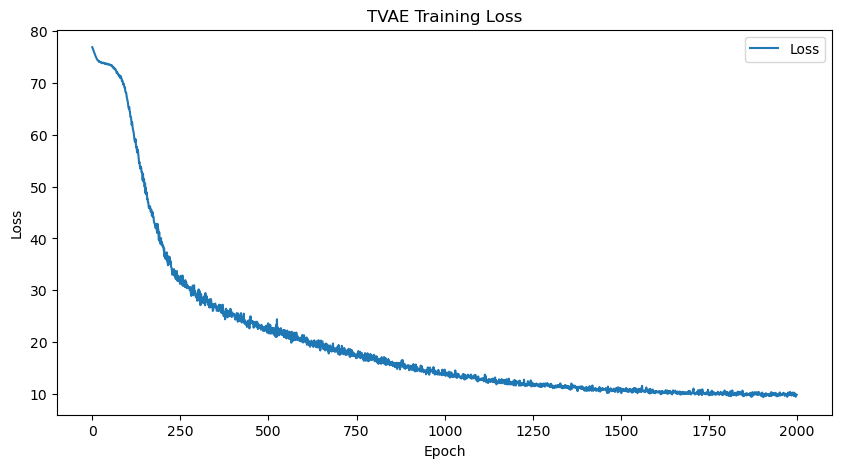

In [14]:
import matplotlib.pyplot as plt

loss_df = synthesizer._model.loss_values

plt.figure(figsize=(10, 5))
plt.plot(loss_df['Epoch'], loss_df['Loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('TVAE Training Loss')
plt.legend()
plt.show()

In [15]:
# Visualize the distribution of a the winner column
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='winner',
    metadata=metadata
)

fig.show()